# Практическая работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 0382 Прибылов Никита и Морева Елена. Вариант №15.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования. 

## Основные теоретические положения

Формулы численного интегрирования:

**Формула прямоугольников**:

$y_{n+1} = y_n + s_{n+1/2}$

**Формула трапеций**:

$y_{n+1} = y_n + \frac{1}{2}(s_n + s_{n+1})$

**Формула Симпсона**:

$y_{n+1} = y_n + \frac{1}{3}(s_{n-1} + 4s_n + s_{n+1})$

**Формула по правилу 3/8**:

$y_{n+2} = y_{n-1} + \frac{1}{8}(s_{n-1} + 3s_n + 3s_{n+1} + s_{n+2})$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул. 

## Выполнение работы

Инициализация начальных значений:

In [99]:
import numpy as np
import matplotlib.pyplot as plt

Вспомогательная функция отрисовки графиков:

In [100]:
def plot(x, Y, legend=None, axis=None, title='', xlabel='', ylabel='', size=(15, 10)):
    plt.figure(figsize=size)
    if legend is None:
        for y in Y:
            plt.plot(x, y)
    else:
        for y, label in zip(Y, legend):
            plt.plot(x, y, label=label)
        plt.legend()
    plt.grid()
    if axis is not None:
        plt.axis(axis)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

**Задание 1**

Были выведены формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построены графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному.

**Формула прямоугольников**:

$y_{n+1} = y_n + s_{n+1/2}, \quad y_0 = 0$

Пусть $s_n = e^{i\omega n}, \quad y_n = H(\omega)e^{i\omega n}$

Тогда:

$\begin{cases}
y_{n+1} = H(\omega)e^{i\omega (n+1)} \\
y_{n+1} = H(\omega)e^{i\omega n} + e^{i\omega (n+1/2)}
\end{cases}$

Отсюда:

$H(\omega)e^{i\omega (n+1)} = H(\omega)e^{i\omega n} + e^{i\omega (n+1/2)}$

$H(\omega)e^{i\omega n}(e^{i\omega}-1) = e^{i\omega (n+1/2)}$

$H(\omega) = \dfrac{e^{\frac{i\omega}{2}}}{e^{i\omega}-1}$

$H(\omega) = \dfrac{1}{e^{\frac{i\omega}{2}}-e^{-\frac{i\omega}{2}}}$

$H(\omega) = \dfrac{1}{2i\sin\left(\frac{\omega}{2}\right)}$

Поскольку $H(\omega) = H(2\pi f) = \tilde H(f)$, получаем:

$\tilde H(f) = \dfrac{1}{2i\sin\left(\pi f\right)}$

Отношение вычисленного и точного значений:

$\gamma = \dfrac{\omega/2}{\sin(\omega/2)} = 1 + \dfrac{\omega^2}{24} + \dfrac{7\omega^4}{5760} + \dots$

$\gamma = \dfrac{\pi f}{\sin(\pi f)} = 1 + \dfrac{\pi^2 f^2}{6} + \dfrac{7\pi^4 f^4}{360} + \dots$

$$$$

**Формула трапеций**:

$y_{n+1} = y_n + \frac{1}{2}(s_n + s_{n+1}), \quad y_0 = 0$

Пусть $s_n = e^{i\omega n}, \quad y_n = H(\omega)e^{i\omega n}$

Тогда:

$\begin{cases}
y_{n+1} = H(\omega)e^{i\omega (n+1)} \\
y_{n+1} = H(\omega)e^{i\omega n} + \frac{1}{2}(e^{i\omega n} + e^{i\omega (n+1)})
\end{cases}$

Отсюда:

$H(\omega)e^{i\omega (n+1)} = H(\omega)e^{i\omega n} + \frac{1}{2}(e^{i\omega n} + e^{i\omega (n+1)})$

$H(\omega)e^{i\omega n}(e^{i\omega}-1) = \frac{1}{2}(e^{i\omega n} + e^{i\omega (n+1)})$

$H(\omega) = \dfrac{e^{i\omega} + 1}{2(e^{i\omega}-1)}$

$H(\omega) = \dfrac{1}{2i\tan\left(\frac{\omega}{2}\right)}$

Поскольку $H(\omega) = H(2\pi f) = \tilde H(f)$, получаем:

$\tilde H(f) = \dfrac{1}{2i\tan\left(\pi f\right)}$

Отношение вычисленного и точного значений:

$\gamma = \dfrac{\omega/2}{\tan(\omega/2)} = 1 - \dfrac{\omega^2}{12} - \dfrac{7\omega^2}{720} - \dots$

$\gamma = \dfrac{\pi f}{\tan(\pi f)} = 1 - \dfrac{\pi^2 f^2}{3} - \dfrac{\pi^4 f^4}{45} - \dots$

$$$$

**Формула Симпсона**:

$y_{n+1} = y_n + \frac{1}{3}(s_{n-1} + 4s_n + s_{n+1}), \quad y_0 = 0$

Пусть $s_n = e^{i\omega n}, \quad y_n = H(\omega)e^{i\omega n}$

Тогда:

$\begin{cases}
y_{n+1} = H(\omega)e^{i\omega (n+1)} \\
y_{n+1} = H(\omega)e^{i\omega (n-1)} + \frac{1}{3}(e^{i\omega (n-1)} + 4e^{i\omega n} + e^{i\omega (n+1)})
\end{cases}$

Отсюда:

$H(\omega)e^{i\omega (n+1)} = H(\omega)e^{i\omega (n-1)} + \frac{1}{3}(e^{i\omega (n-1)} + 4e^{i\omega n} + e^{i\omega (n+1)})$

$H(\omega)e^{i\omega n}(e^{i\omega} - e^{-i\omega}) = \frac{1}{3}(e^{i\omega (n-1)} + 4e^{i\omega n} + e^{i\omega (n+1)})$

$H(\omega) = \dfrac{e^{-i\omega} + 4 + e^{i\omega}}{3(e^{i\omega} - e^{-i\omega})}$

$H(\omega) = \dfrac{1}{3i\tan(\omega)} + \dfrac{2}{3i\sin(\omega)}$

$H(\omega) = \dfrac{\cos(\omega) + 2}{3i\sin(\omega)}$

Поскольку $H(\omega) = H(2\pi f) = \tilde H(f)$, получаем:

$\tilde H(f) = \dfrac{\cos(2\pi f) + 2}{3i\sin(2\pi f)}$

Отношение вычисленного и точного значений:

$\gamma = \dfrac{2 + \cos(\omega)}{3} \cdot \dfrac{\omega}{\sin(\omega)} = 1 + \dfrac{\omega^4}{180} + \dots$

$\gamma = \dfrac{2 + \cos(2\pi f)}{3} \cdot \dfrac{2\pi f}{\sin(2\pi f)} = 1 + \dfrac{4\pi^4 f^4}{45} + \dots$

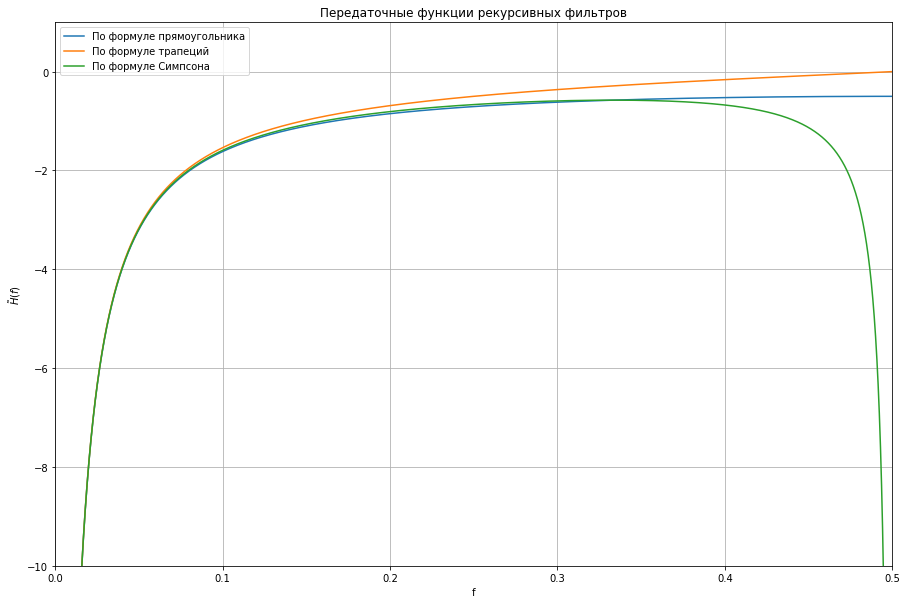

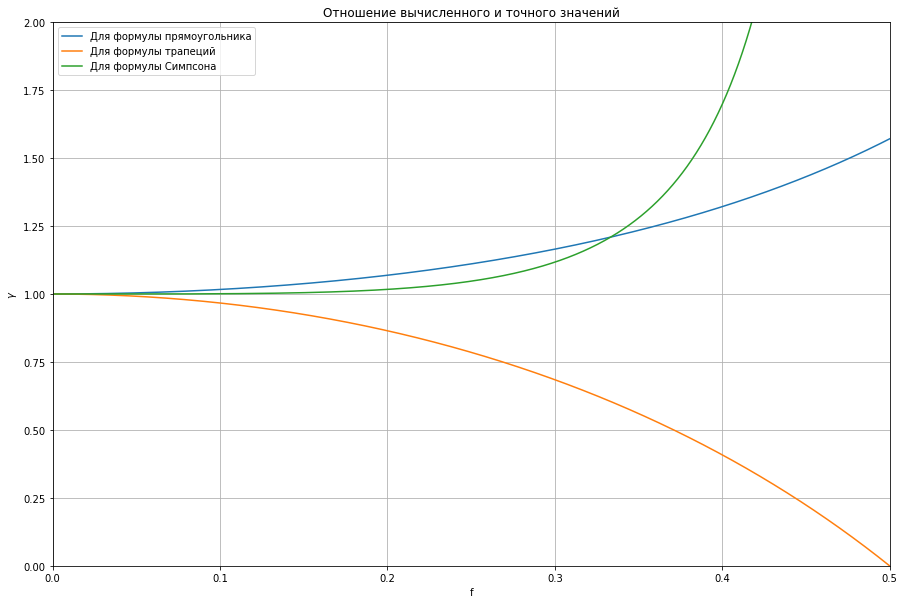

In [101]:
H_rect = lambda f: (1 / (2j * np.sin(np.pi * f))).imag
H_trap = lambda f: (1 / (2j * np.tan(np.pi * f))).imag
H_simp = lambda f: ((np.cos(2 * np.pi * f) + 2) / (3j * np.sin(2 * np.pi * f))).imag

X = np.linspace(0.001, 0.5, 10000)
Y1 = H_rect(X), H_trap(X), H_simp(X)
legend = 'По формуле прямоугольника', 'По формуле трапеций', 'По формуле Симпсона'

plot(X, Y1, legend, axis=(0, 0.5, -10, 1), title='Передаточные функции рекурсивных фильтров', \
    xlabel='f', ylabel=r'$\tilde H(f)$')

gamma_rect = lambda f: np.pi * f / np.sin(np.pi * f)
gamma_trap = lambda f: np.pi * f / np.tan(np.pi * f)
gamma_simp = lambda f: (2 + np.cos(2 * np.pi * f)) / 3 * 2 * np.pi * f / np.sin(2 * np.pi * f)

X = np.linspace(0.001, 0.5, 10000)
Y1 = gamma_rect(X), gamma_trap(X), gamma_simp(X)
legend = 'Для формулы прямоугольника', 'Для формулы трапеций', 'Для формулы Симпсона'

plot(X, Y1, legend, axis=(0, 0.5, 0, 2), title='Отношение вычисленного и точного значений', \
     xlabel='f', ylabel=r'$\gamma$')


Из графиков следует, что фильтры по формулам прямоугольника и Симпсона усиливают высокие частоты, а фильтр по формуле трапеций их подавляет.

**Задание 2**

Была выведена формула передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8».
Был построен график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному.

$y_{n+2} = y_{n-1} + \frac{1}{8}(s_{n-1} + 3s_n + 3s_{n+1} + s_{n+2}), \quad y_0 = 0$

Пусть $s_n = e^{i\omega n}, \quad y_n = H(\omega)e^{i\omega n}$

Тогда:

$\begin{cases}
y_{n+2} = H(\omega)e^{i\omega (n+2)} \\
y_{n+2} = H(\omega)e^{i\omega (n-1)} + \frac{1}{8}(e^{i\omega (n-1)} + 3e^{i\omega n} + 3e^{i\omega (n+1)} + e^{i\omega (n+2)})
\end{cases}$

Отсюда:

$H(\omega)e^{i\omega (n+2)} = 
H(\omega)e^{i\omega (n-1)} + \frac{1}{8}(e^{i\omega (n-1)} + 3e^{i\omega n} + 3e^{i\omega (n+1)} + e^{i\omega (n+2)})$

$H(\omega)e^{i\omega n}(e^{2i\omega} - e^{-i\omega}) = 
\frac{1}{8}(e^{i\omega (n-1)} + 3e^{i\omega n} + 3e^{i\omega (n+1)} + e^{i\omega (n+2)})$

$H(\omega)(e^{2i\omega} - e^{-i\omega}) = \frac{1}{8}(e^{-i\omega} + 3 + 3e^{i\omega} + e^{2i\omega})$

$H(\omega) = \dfrac{e^{-i\omega} + 3 + 3e^{i\omega} + e^{2i\omega}} {8(e^{2i\omega} - e^{-i\omega})}$

$H(\omega) = \dfrac{e^{2i\omega} + e^{-i\omega}} {8(e^{2i\omega} - e^{-i\omega})} +
\dfrac{3 + 3e^{i\omega}} {8(e^{2i\omega} - e^{-i\omega})}$

$H(\omega) = \dfrac{e^{3i\omega} + 1} {8(e^{3i\omega} - 1)} +
\dfrac{3e^{\frac{-i\omega}{2}} + 3e^{\frac{i\omega}{2}}} {8\left(e^{\frac{3i\omega}{2}} - e^{\frac{-3i\omega}{2}}\right)}$

$H(\omega) = \dfrac{1}{8i \tan\left(\frac{3\omega}{2}\right)} + \dfrac{3\cos\left(\frac{\omega}{2}\right)}{8i\sin\left(\frac{3\omega}{2}\right)}$

$H(\omega) = \dfrac{\cos\left(\frac{3\omega}{2}\right) + 3\cos\left(\frac{\omega}{2}\right)}{8i\sin\left(\frac{3\omega}{2}\right)}$

Поскольку $H(\omega) = H(2\pi f) = \tilde H(f)$, получаем:

$H(\omega) = \dfrac{\cos\left(3\pi f\right) + 3\cos\left(\pi f\right)}{8i\sin\left(3\pi f\right)}$

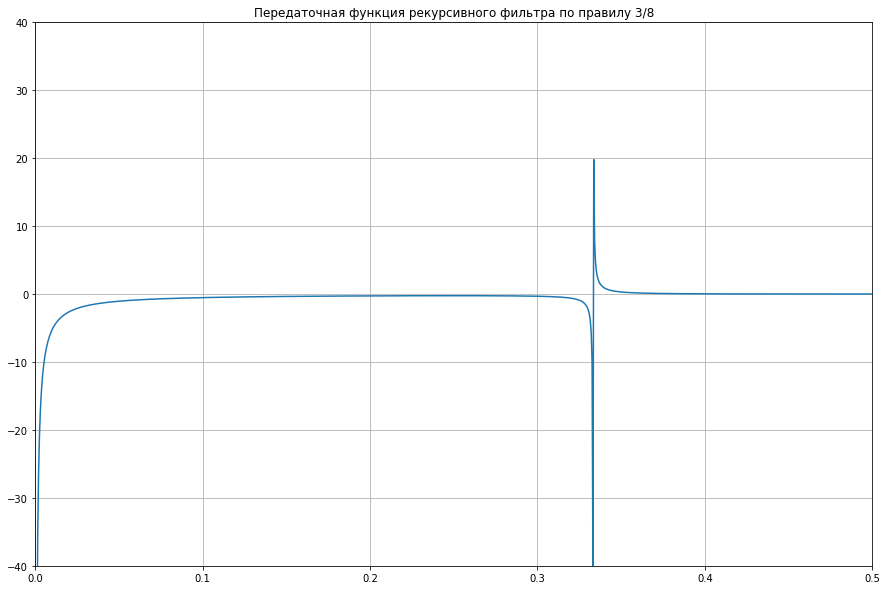

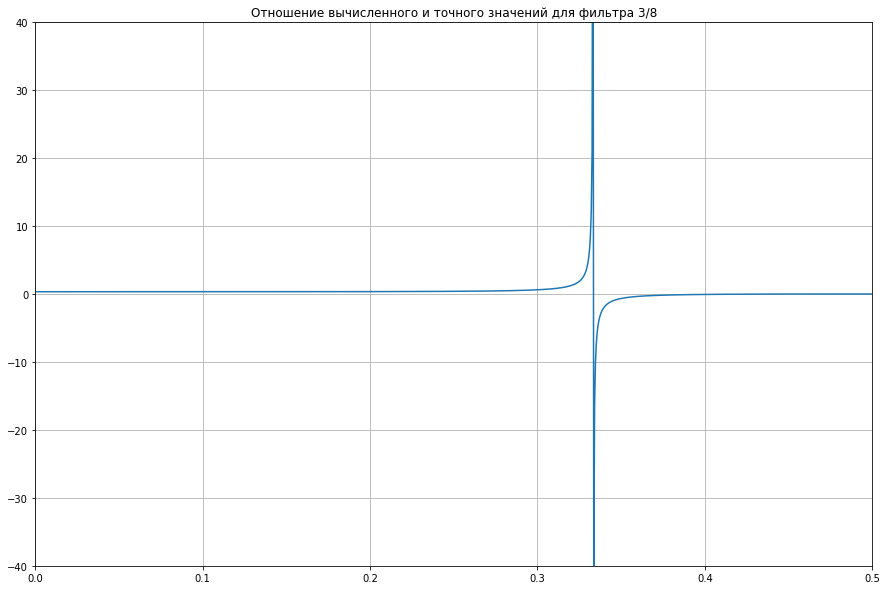

In [102]:
H38 = lambda f: ((np.cos(3 * np.pi * f) + 3 * np.cos(np.pi * f)) / (8j * np.sin(3 * np.pi * f))).imag

X = np.linspace(0.001, 0.5, 1000)
Y2 = H38(X),

plot(X, Y2, axis=(0, 0.5, -40, 40), title='Передаточная функция рекурсивного фильтра по правилу 3/8')

gamma_38 = lambda f: 1/12*(np.cos(3*np.pi*f) + 3*np.cos(np.pi*f))*((3*np.pi*f) / np.sin(3*np.pi*f))
Y3 = gamma_38(X),

plot(X, Y3, axis=(0, 0.5, -40, 40), title='Отношение вычисленного и точного значений для фильтра 3/8')


В точке 1/3 Гц функция претерпевает разрыв, что выражается скачком на графиках. Фильтр практически не подавляет и не усиливает частоты (за исключением окрестности точки разрыва).

**Задание 3**

Сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении пп.1 и 2:

1. Фильтры по формулам прямоугольника и Симпсона усиливают высокие частоты, а фильтр по формуле трапеций, наоборот, их подавляет.
2. Фильтр по формуле 3/8 имеет негладкую функцию, в отличие от фильтров по формулам прямоугольника, трапеций, Симпсона.

## Выводы

В ходе выполнения работы был проведен анализ частотных характеристик известных формул численного интегрирования: формулы прямоугольников, трапеций, Симпсона и трёх восьмых. Также были выведены формулы передаточных функций рекурсивных фильтров и построены их графики. Были вычислены отношения вычисляемого в результате фильтрации значения к истинному и отображены их графики. Для полученных результатов был проведен сравнительный анализ.